In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
VGG19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 0s 0us/step


In [ ]:
VGG19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
for layer in VGG19.layers:
    layer.trainable = False

In [ ]:
folders = glob('drive/MyDrive/Dataset/Train/*')
folders

['drive/MyDrive/Dataset/Train/Uninfected',
 'drive/MyDrive/Dataset/Train/Parasite']

In [ ]:
x=Flatten()(VGG19.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=VGG19.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('drive/MyDrive/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('drive/MyDrive/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
13/13 [==============================] - 347s 27s/step - loss: 0.1195 - accuracy: 0.9712 - val_loss: 0.3307 - val_accuracy: 0.8358
Epoch 2/50
13/13 [==============================] - 347s 27s/step - loss: 0.1257 - accuracy: 0.9615 - val_loss: 0.2186 - val_accuracy: 0.8955
Epoch 3/50
13/13 [==============================] - 347s 27s/step - loss: 0.1234 - accuracy: 0.9591 - val_loss: 0.2912 - val_accuracy: 0.8806
Epoch 4/50
13/13 [==============================] - 347s 27s/step - loss: 0.1078 - accuracy: 0.9663 - val_loss: 0.2202 - val_accuracy: 0.9179
Epoch 5/50
13/13 [==============================] - 347s 27s/step - loss: 0.1359 - accuracy: 0.9543 - val_loss: 0.2679 - val_accuracy: 0.9104
Epoch 6/50
13/13 [==============================] - 348s 27s/step - loss: 0.1444 - accuracy: 0.9615 - val_loss: 0.5147 - val_accuracy: 0.7463
Epoch 7/50
13/13 [==============================] - 347s 27s/step - loss: 0.1321 - accuracy: 0.9567 - val_loss: 0.1924 - val_accuracy: 0.9403
Epoch 

KeyboardInterrupt: ignored

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

NameError: ignored

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[1.20965287e-01, 8.79034698e-01],
       [1.87999055e-01, 8.12000930e-01],
       [4.59292769e-01, 5.40707231e-01],
       [8.81451309e-01, 1.18548766e-01],
       [9.99956727e-01, 4.32391389e-05],
       [2.02384338e-01, 7.97615647e-01],
       [9.99661326e-01, 3.38685146e-04],
       [9.98528600e-01, 1.47137383e-03],
       [9.99922514e-01, 7.74885120e-05],
       [7.62558103e-01, 2.37441912e-01],
       [9.99999404e-01, 5.39965583e-07],
       [1.52941570e-01, 8.47058475e-01],
       [1.40902057e-01, 8.59097958e-01],
       [9.42176700e-01, 5.78233264e-02],
       [8.60001206e-01, 1.39998823e-01],
       [5.31257987e-01, 4.68742073e-01],
       [9.71711338e-01, 2.82886885e-02],
       [9.99454439e-01, 5.45545947e-04],
       [4.81196903e-02, 9.51880336e-01],
       [9.81717825e-01, 1.82822086e-02],
       [2.98447102e-01, 7.01552868e-01],
       [9.99610364e-01, 3.89721652e-04],
       [2.25381747e-01, 7.74618208e-01],
       [2.91168571e-01, 7.08831489e-01],
       [7.297695

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_vgg19.h5')

In [ ]:
img=image.load_img('drive/MyDrive/Dataset/Test/Uninfected/2.png',target_size=(224,224))

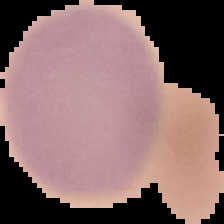

In [ ]:
img

In [ ]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(x)

array([[0.5705844 , 0.42941558]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(x), axis=1)

In [ ]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
